<a href="https://colab.research.google.com/github/CranalLizze/IBM/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

####The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [5]:
df.shape

(550068, 10)

In [6]:
df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [7]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()

3631

In [10]:
df["City_Category"].nunique()

3

In [11]:
np.round((df.Gender.value_counts()/df.shape[0])*100,2)

M    75.31
F    24.69
Name: Gender, dtype: float64

**Insight:** The number of male customer is larger than the female customer.

In [12]:
np.round(((df.Age.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

**Insight:** Most of the customers are between the range of 18 to 35.

In [13]:
np.round(((df.Occupation.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40
18     1.20
9      1.14
8      0.28
Name: Occupation, dtype: float64

In [14]:
np.round(((df.City_Category.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

B    42.03
C    31.12
A    26.85
Name: City_Category, dtype: float64

In [15]:
np.round(((df.Stay_In_Current_City_Years.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

In [16]:
np.round(((df.Marital_Status.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

0    59.03
1    40.97
Name: Marital_Status, dtype: float64

**Insight:** The number of unmarried customers are slightly higher than the married customers.

In [17]:
np.round(((df.Product_Category.value_counts()/df.shape[0])*100).sort_values(ascending=False),2)

5     27.44
1     25.52
8     20.71
11     4.42
2      4.34
6      3.72
3      3.67
4      2.14
16     1.79
15     1.14
13     1.01
10     0.93
12     0.72
7      0.68
18     0.57
20     0.46
19     0.29
14     0.28
17     0.11
9      0.07
Name: Product_Category, dtype: float64

## Univariate analysis

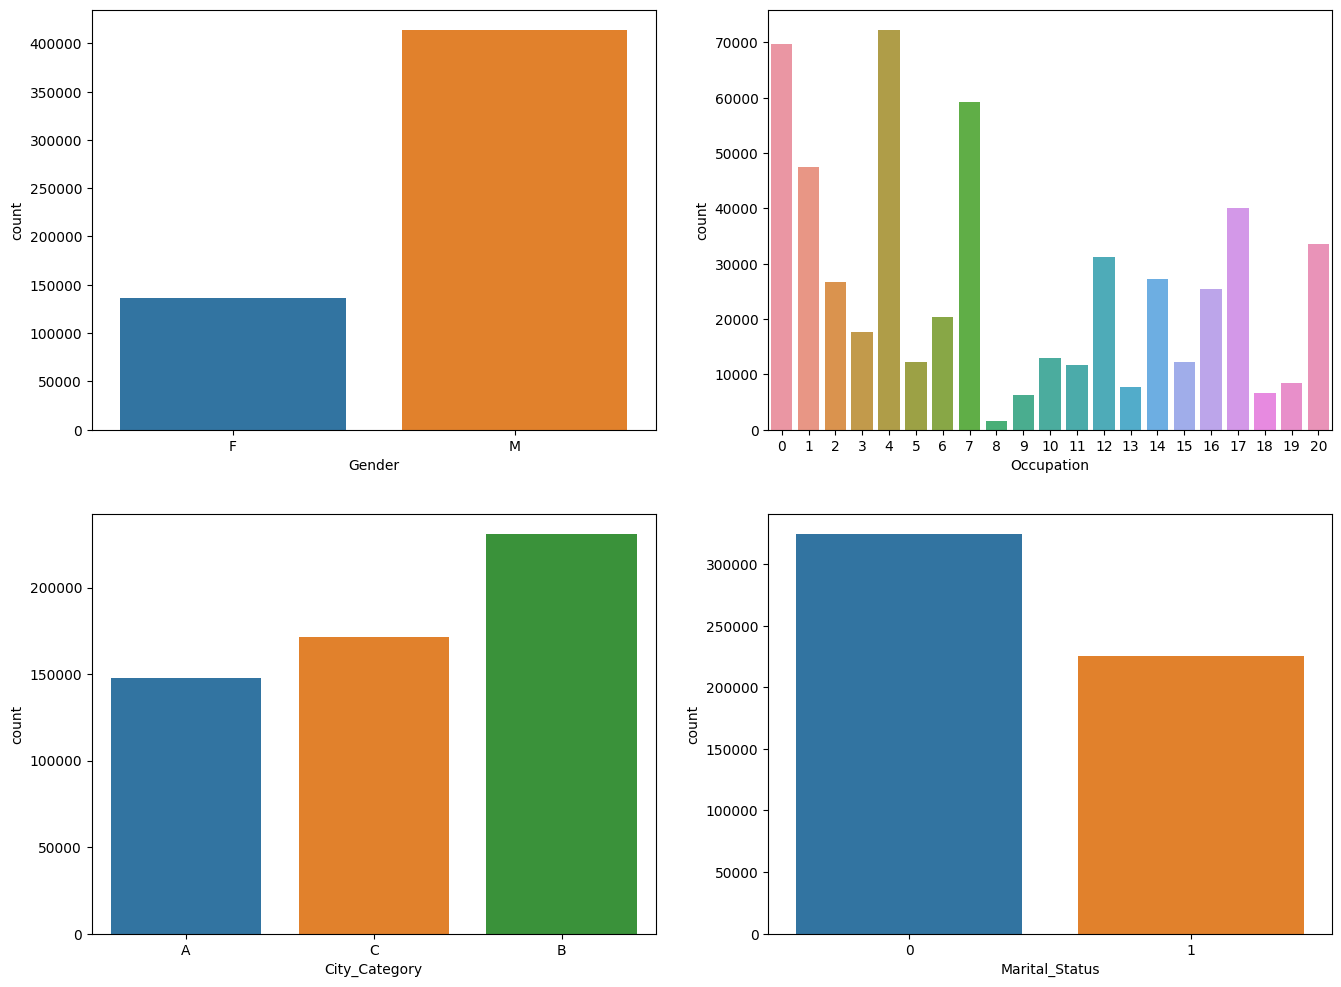

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()


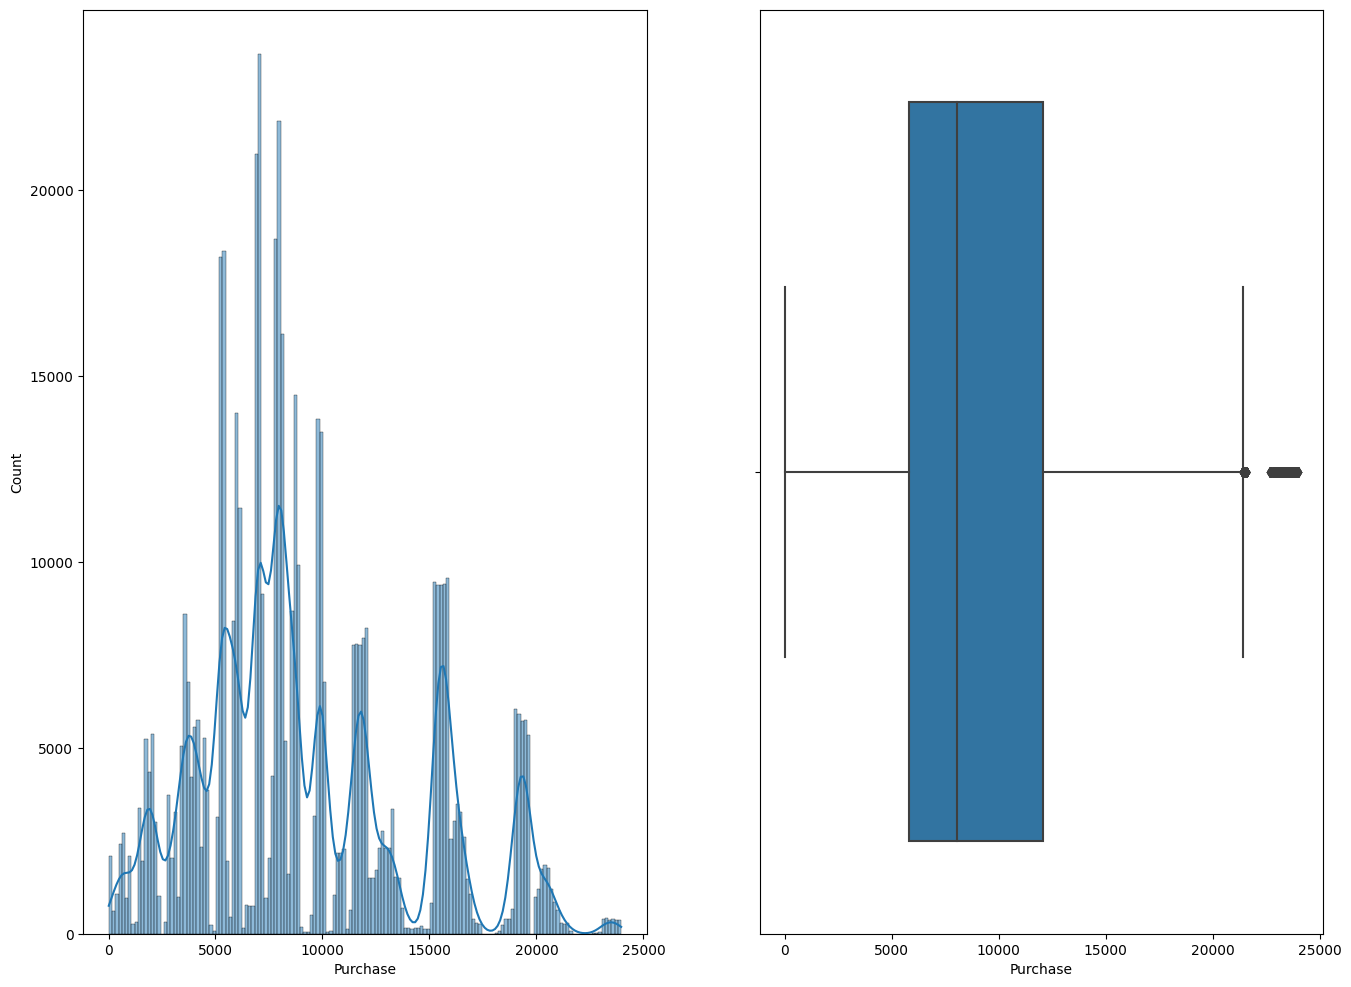

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
sns.histplot(data=df, x='Purchase', kde=True, ax=axs[0])
sns.boxplot(data=df, x='Purchase', orient='h', ax=axs[1])
plt.show()


**Insight:** There are few outliers in the purchase and most of the customers spent between 5000 to 13000.

## Bivariate analysis

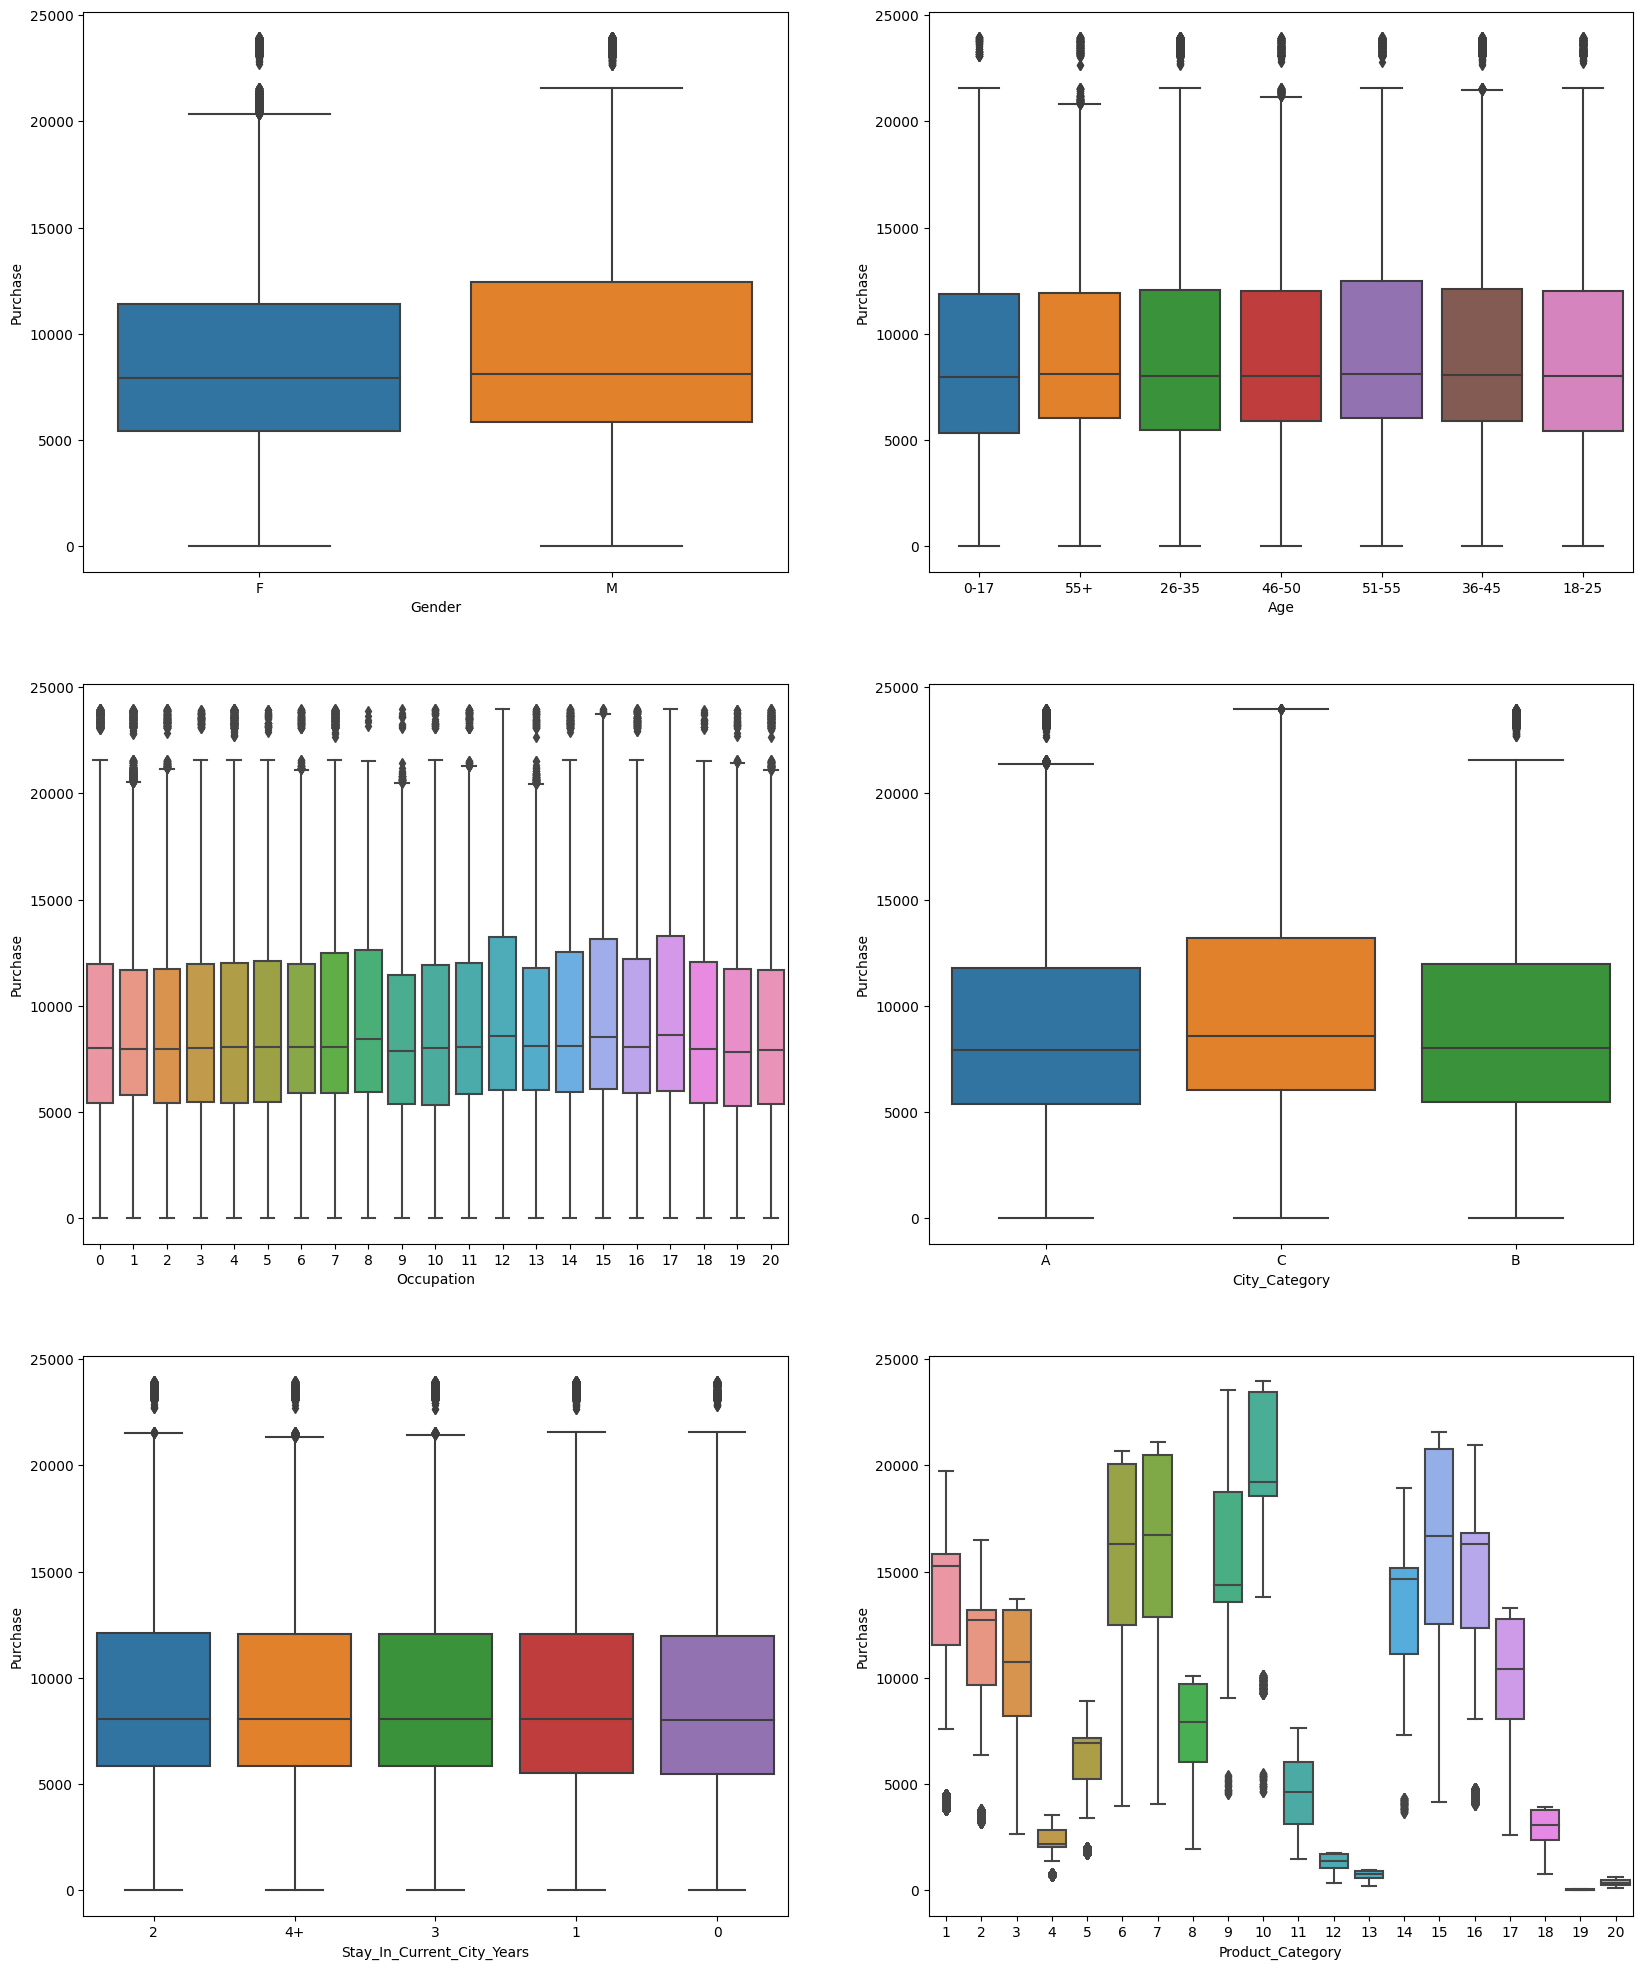

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)

sns.boxplot(data=df, y='Purchase', x='Gender', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Age', ax=axs[0,1])
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='City_Category', ax=axs[1,1])
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=axs[2,0])
sns.boxplot(data=df, y='Purchase', x='Product_Category', ax=axs[2,1])
plt.show()

**Insight:** There are outlier in purchase.

<ipython-input-21-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


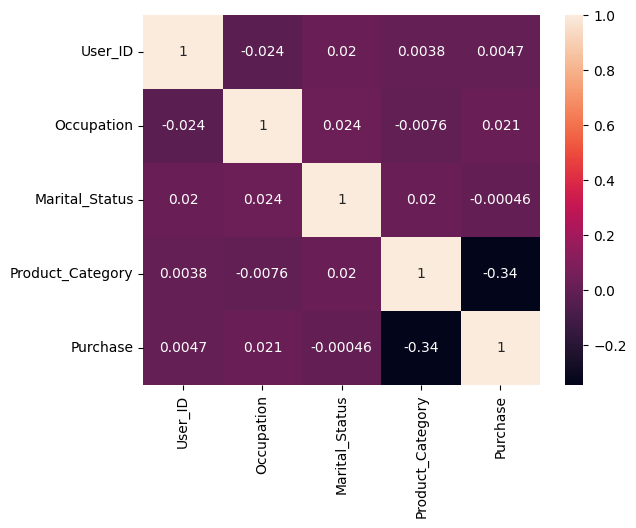

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## The amount spent per transaction of all the 50 million female customers, and all the 50 million male customers.

In [23]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


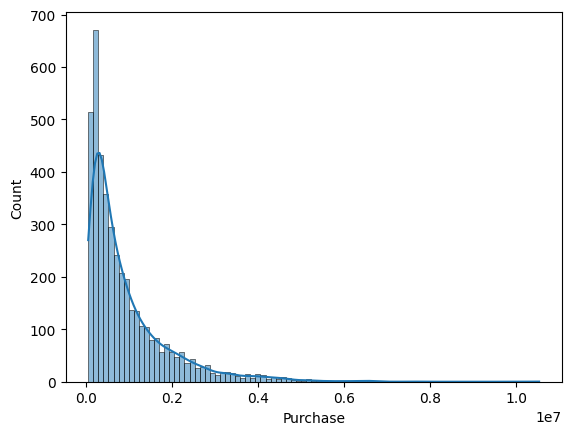

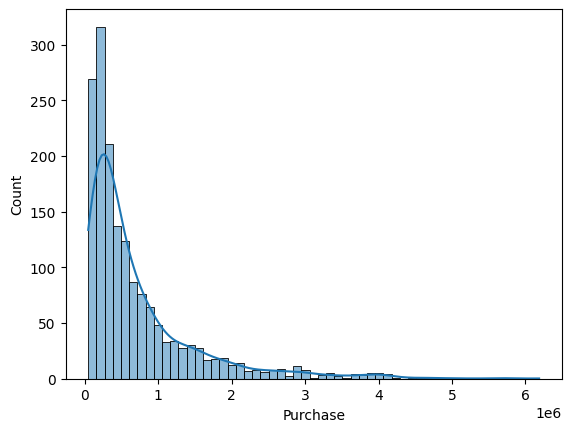

In [24]:
sns.histplot(data=amt_df[amt_df['Gender']=='M'], x='Purchase', kde=True)
plt.show()
sns.histplot(data=amt_df[amt_df['Gender']=='F'], x='Purchase', kde=True)
plt.show()

In [25]:
print("The average amount spend by male is ", np.round(amt_df[amt_df['Gender']=='M']['Purchase'].mean(),2))
print("The average amount spend by Female is ", np.round(amt_df[amt_df['Gender']=='F']['Purchase'].mean(),2))

The average amount spend by male is  925344.4
The average amount spend by Female is  712024.39


**Insight:** Male customer spends more than female customers.

## The sample average to find out an interval within which the population average will lie

In [26]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [27]:

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

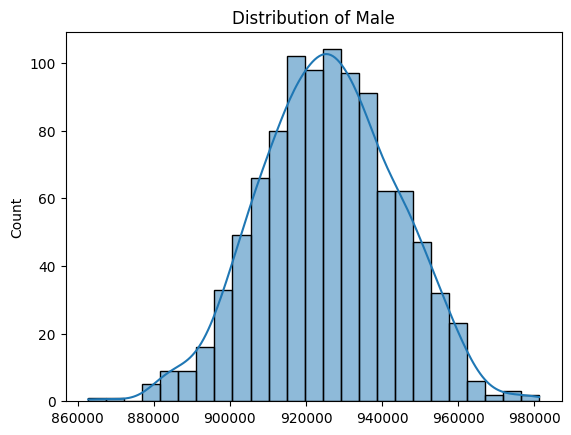

In [28]:
sns.histplot(data=male_means,  kde=True)
plt.title("Distribution of Male")
plt.show()

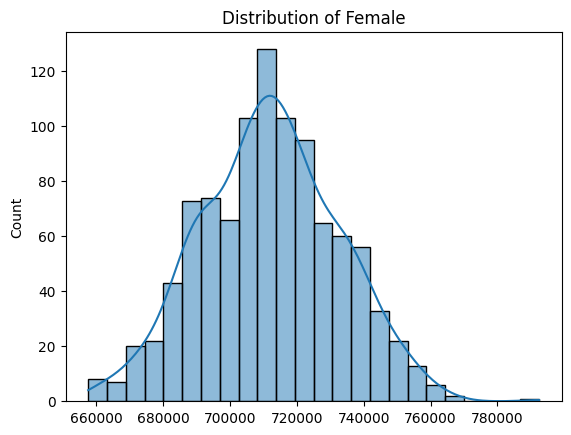

In [29]:
sns.histplot(data=female_means,  kde=True)
plt.title("Distribution of Female")

plt.show()

In [30]:
print("Standard deviation for Male is ", male_df['Purchase'].std())
print("Standard deviation for Female is ", female_df['Purchase'].std())

Standard deviation for Male is  985830.1007953875
Standard deviation for Female is  807370.7261464577


**Insight:** Using Central Limit Theorem, the standard deviation for male is 985830.1 and female is 807370.7.

## Confidence Interval

In [31]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Insight:** 95% of the times the amount spend by male customer will lie in between (895617.83, 955070.97) and female customer will lie in between (673254.77, 750794.02)

In [32]:
amt_mar_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum().reset_index()
amt_mar_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [33]:
amt_mar_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

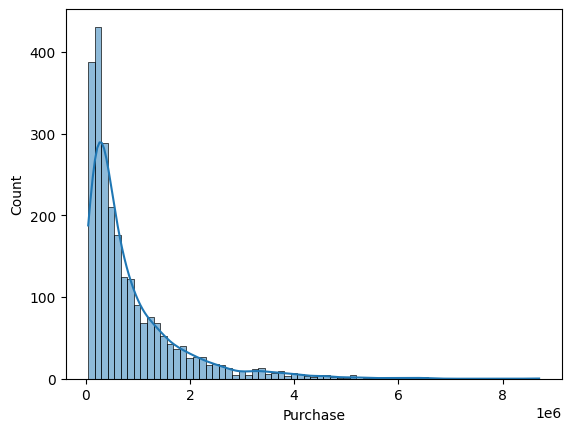

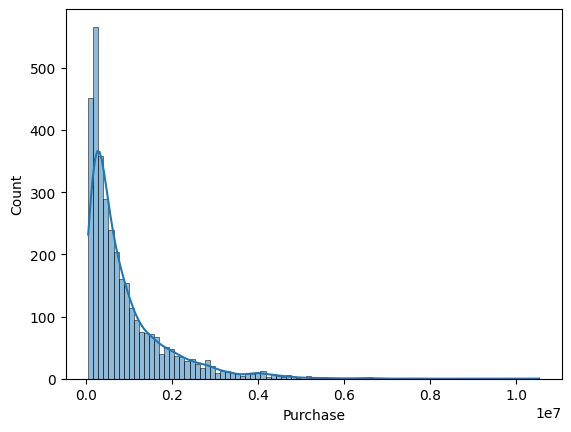

In [34]:
sns.histplot(data=amt_mar_df[amt_mar_df['Marital_Status']== 1], x='Purchase', kde=True)
plt.show()
sns.histplot(data=amt_mar_df[amt_mar_df['Marital_Status']== 0], x='Purchase', kde=True)
plt.show()

##  Amount spent per transaction of all the married and unmarried customers

In [35]:
male_df = amt_mar_df[amt_mar_df['Marital_Status']== 1]
female_df = amt_mar_df[amt_mar_df['Marital_Status']== 0]

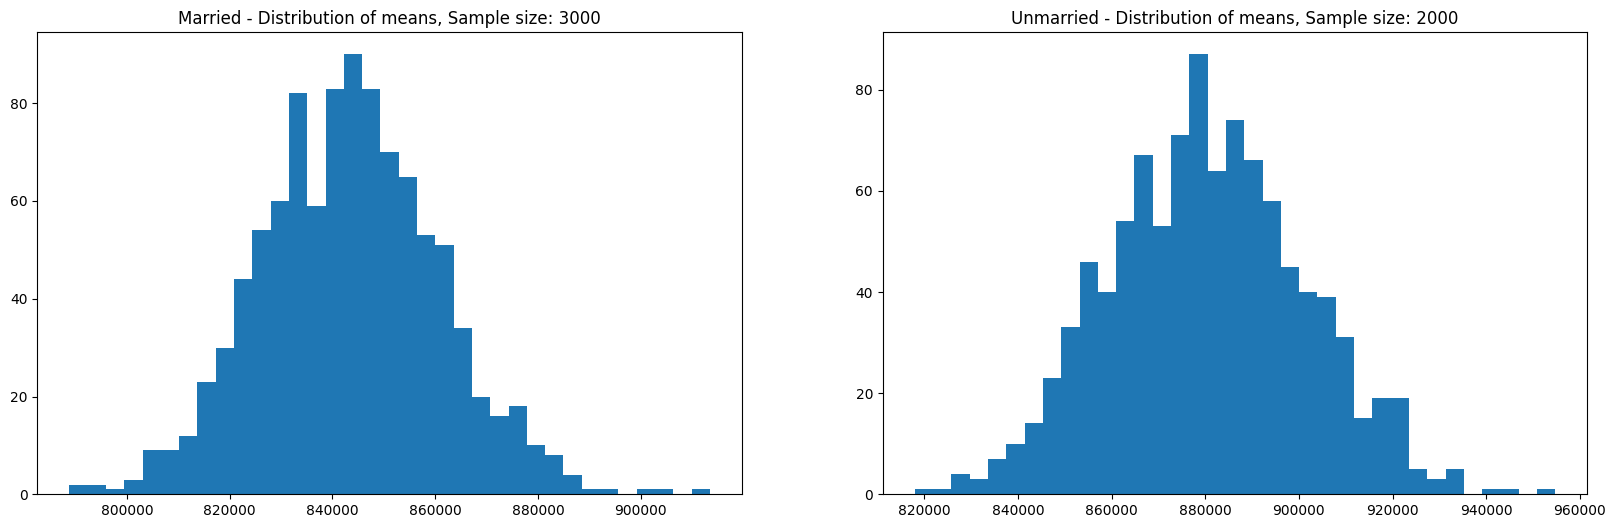

In [36]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_mar_df[amt_mar_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_mar_df[amt_mar_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

In [37]:
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))


Population mean - Mean of sample means of amount spend for Married: 843382.01
Population mean - Mean of sample means of amount spend for Unmarried: 880405.15


In [38]:
print((amt_mar_df[amt_mar_df['Marital_Status']==1]['Purchase'].std()))
print(amt_mar_df[amt_mar_df['Marital_Status']==0]['Purchase'].std())

935352.1158252305
949436.2495552396


**Insight:** Even thought the number of unmarried customer are greater than the married cutomers, the amount spend almost coincide.

## Recommendations

1. From the above insights, men shops in walmart more than women and spends more on purchases. Hence Walmart needs to target on female audience more by facilitating them by giving offers on female products.

2. The average spending on purchase between married and unmarried overlaps. Walmart can now leverage to group them as a single group in order to increase the sale.

3. Most of the customers are between the range of 18 to 35. Walmart should target on customers in age group of 40 and above as they can be a possible buyer.